In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
import os

In [2]:
df=pd.read_csv('imdb_top_1000.csv')

In [3]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [6]:
print(df['Genre'].value_counts())


Drama                         85
Drama, Romance                37
Comedy, Drama                 35
Comedy, Drama, Romance        31
Action, Crime, Drama          30
                              ..
Crime, Film-Noir, Thriller     1
Crime, Drama, History          1
Thriller                       1
Comedy, Crime, Thriller        1
Comedy, Crime, Sport           1
Name: Genre, Length: 202, dtype: int64


In [7]:
print(df['Series_Title'].value_counts())

Drishyam                       2
Minority Report                1
Raazi                          1
Jojo Rabbit                    1
Baahubali 2: The Conclusion    1
                              ..
Rashômon                       1
Mulan                          1
Kung fu                        1
Gattaca                        1
Tombstone                      1
Name: Series_Title, Length: 999, dtype: int64


C:\Users\NEOWISE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IMDB_Rating', ylabel='count'>

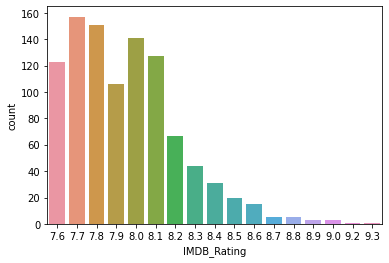

In [8]:
df.sort_values('IMDB_Rating')
sns.countplot(df['IMDB_Rating'])

In [9]:
print(df['Released_Year'].value_counts())

2014    32
2004    31
2009    29
2016    28
2013    28
        ..
1930     1
PG       1
1926     1
1922     1
1943     1
Name: Released_Year, Length: 100, dtype: int64


In [19]:
df.replace({'PG':1}, inplace = True)

In [22]:
df['Released_Year']= df['Released_Year'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   int32  
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int32(1), int64(1), object(12)
memory usage: 121.2+ KB


In [26]:
df['Released_Year'].unique()

array([1994, 1972, 2008, 1974, 1957, 2003, 1993, 2010, 1999, 2001, 1966,
       2002, 1990, 1980, 1975, 2020, 2019, 2014, 1998, 1997, 1995, 1991,
       1977, 1962, 1954, 1946, 2011, 2006, 2000, 1988, 1985, 1968, 1960,
       1942, 1936, 1931, 2018, 2017, 2016, 2012, 2009, 2007, 1984, 1981,
       1979, 1971, 1963, 1964, 1950, 1940, 2013, 2005, 2004, 1992, 1987,
       1986, 1983, 1976, 1973, 1965, 1959, 1958, 1952, 1948, 1944, 1941,
       1927, 1921, 2015, 1996, 1989, 1978, 1961, 1955, 1953, 1925, 1924,
       1982, 1967, 1951, 1949, 1939, 1937, 1934, 1928, 1926, 1920, 1970,
       1969, 1956, 1947, 1945, 1930, 1938, 1935, 1933, 1932, 1922, 1943,
          1])

In [31]:
df[(df['Released_Year'] >= 2008) & (df['Released_Year'] <= 2010)]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
64,https://m.media-amazon.com/images/M/MV5BNTkyOG...,3 Idiots,2009,UA,170 min,"Comedy, Drama",8.4,Two friends are searching for their long lost ...,67.0,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh,Sharman Joshi,344445,"6,532,908"
66,https://m.media-amazon.com/images/M/MV5BMjExMT...,WALL·E,2008,U,98 min,"Animation, Adventure, Family",8.4,"In the distant future, a small waste-collectin...",95.0,Andrew Stanton,Ben Burtt,Elissa Knight,Jeff Garlin,Fred Willard,999790,"223,808,164"
90,https://m.media-amazon.com/images/M/MV5BMWE3MG...,Incendies,2010,R,131 min,"Drama, Mystery, War",8.3,Twins journey to the Middle East to discover t...,80.0,Denis Villeneuve,Lubna Azabal,Mélissa Désormeaux-Poulin,Maxim Gaudette,Mustafa Kamel,150023,"6,857,096"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,https://m.media-amazon.com/images/M/MV5BMTU0Nz...,Seven Pounds,2008,UA,123 min,Drama,7.6,A man with a fateful secret embarks on an extr...,36.0,Gabriele Muccino,Will Smith,Rosario Dawson,Woody Harrelson,Michael Ealy,286770,"69,951,824"
920,https://m.media-amazon.com/images/M/MV5BMjEzMj...,The Secret of Kells,2009,NaN,71 min,"Animation, Adventure, Family",7.6,A young boy in a remote medieval outpost under...,81.0,Tomm Moore,Nora Twomey,Evan McGuire,Brendan Gleeson,Mick Lally,31779,"686,383"
927,https://m.media-amazon.com/images/M/MV5BNzU3ND...,Harry Potter and the Half-Blood Prince,2009,UA,153 min,"Action, Adventure, Family",7.6,As Harry Potter begins his sixth year at Hogwa...,78.0,David Yates,Daniel Radcliffe,Emma Watson,Rupert Grint,Michael Gambon,474827,"301,959,197"
930,https://m.media-amazon.com/images/M/MV5BY2IzNG...,Watchmen,2009,A,162 min,"Action, Drama, Mystery",7.6,"In 1985 where former superheroes exist, the mu...",56.0,Zack Snyder,Jackie Earle Haley,Patrick Wilson,Carla Gugino,Malin Akerman,500799,"107,509,799"


76.0    32
84.0    29
90.0    29
86.0    27
72.0    27
        ..
44.0     1
41.0     1
33.0     1
40.0     1
48.0     1
Name: Meta_score, Length: 63, dtype: int64


C:\Users\NEOWISE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='count'>

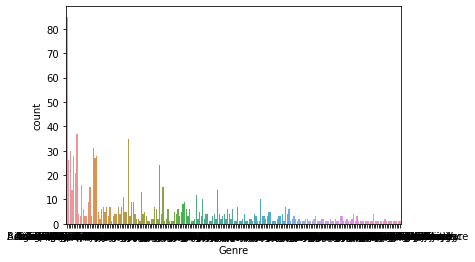

In [35]:
print(df['Meta_score'].value_counts())
sns.countplot(df['Genre'])

In [ ]:
df['']